SP
%peak of Memory-bound kernel  : 96.4%
%peak of Compute-bound kernel  : 19.7%
HP
%peak of Memory-bound kernel  : 106.8%
%peak of Compute-bound kernel  : 13.7%
[0.1] [0.7] m* Memory-bound kernel
[3.5] [5] rd Compute-bound kernel
[0.1] [0.8] m* Memory-bound kernel
[8.5] [8.7] rd Compute-bound kernel


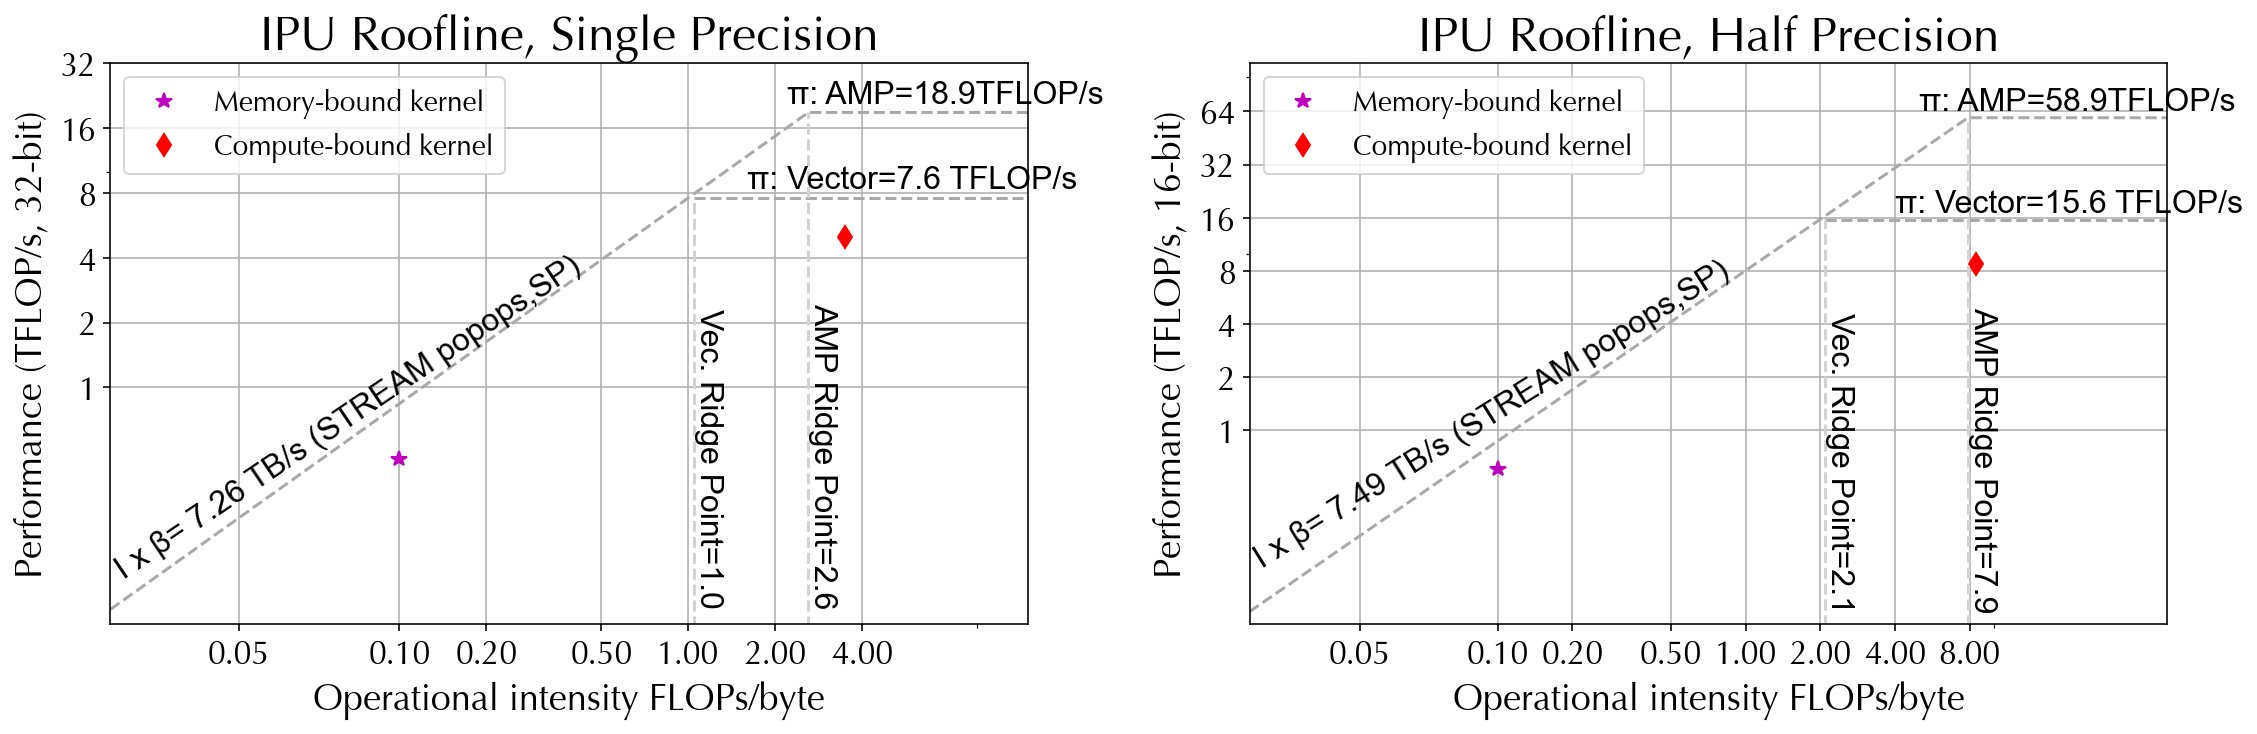

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rcParams['font.family'] = 'Optima'
mpl.rcParams['text.usetex'] = 'False'
fig, ax = plt.subplots(1,2, figsize=(16,5.2))
peak_tflops_sp_vec = 7.6
peak_tflops_hp_vec = 15.6
peak_tflops_sp_amp = 18.9
peak_tflops_hp_amp = 58.9
peak_stream_sp_poplibs = 7260.8/1000
peak_stream_hp_poplibs = 7489.34/1000
mem_ridge_point_sp1 = peak_tflops_sp_vec / peak_stream_sp_poplibs
mem_ridge_point_sp2 = peak_tflops_sp_amp / peak_stream_sp_poplibs
mem_ridge_point_hp1 = peak_tflops_hp_vec / peak_stream_hp_poplibs
mem_ridge_point_hp2 = peak_tflops_hp_amp / peak_stream_hp_poplibs

c0 = peak_tflops_sp_vec - mem_ridge_point_sp1 * peak_stream_sp_poplibs
c_hp= peak_tflops_hp_vec - mem_ridge_point_hp1 * peak_stream_hp_poplibs
x_int = 0.01
y_int = peak_stream_sp_poplibs * x_int + c0
y_int_hp =peak_stream_hp_poplibs *x_int + c_hp

mem_oi = [1,1,1,1]
mem_oi[0] = [(mem_ridge_point_sp1, peak_tflops_sp_vec),(100, peak_tflops_sp_vec)]
mem_oi[1] = [(x_int,y_int),(mem_ridge_point_sp2, peak_tflops_sp_amp),(100, peak_tflops_sp_amp)]
mem_oi[2] = [(mem_ridge_point_hp1, peak_tflops_hp_vec),(100, peak_tflops_hp_vec)]
mem_oi[3] = [(x_int,y_int_hp),(mem_ridge_point_hp2, peak_tflops_hp_amp),(100, peak_tflops_hp_amp)]

for i in range(2):
    ax[0].plot([x for x,y in mem_oi[i]], [y for x,y in mem_oi[i]], '--', markersize=0.,  c='darkgray')


for i in range(2,4):
    ax[1].plot([x for x,y in mem_oi[i]], [y for x,y in mem_oi[i]], '--', markersize=0.,  c='darkgray')

ax[0].set_xlim((0.01,15))
ax[0].set_ylim((0.01,20))

ax[1].set_xlim((0.01,50))
ax[1].set_ylim((0.01,120))


ax[0].set_xscale("symlog", linthreshx=0.1)
ax[0].set_yscale("symlog", linthreshy=1)

ax[1].set_xscale("symlog", linthreshx=0.1)
ax[1].set_yscale("symlog", linthreshy=1)

def tflops(time, image):
    Tera =  1e12
    image_sizes = dict(cheese=(2200,1122), leaf=(768,1024), bricks=(499,302))
    x,y = image_sizes[image]
    return (x * y * 4 * 11 * 200)/time/Tera

data = [
    (0.1,0.7, 'Memory-bound kernel', 'm*'),
    (3.5,5, 'Compute-bound kernel', 'rd'),

]
data_hp = [
    (0.1, 0.8, 'Memory-bound kernel', 'm*'),
    (8.5,8.7, 'Compute-bound kernel', 'rd'),

]

print("SP")
for x in data:
    print("%peak of {}  : {:.1f}%".format(x[2],x[1]/(x[0] *peak_stream_sp_poplibs + c0)*100))

print("HP")
for x in data_hp:
    print("%peak of {}  : {:.1f}%".format(x[2],x[1]/(x[0] *peak_stream_hp_poplibs + c_hp)*100))

    
for x in data:
    print([x[0]], [x[1]], x[3], x[2])
    ax[0].plot(x[0], x[1], x[3], markersize=8., label=x[2])

for x in data_hp:
    print([x[0]], [x[1]], x[3], x[2])
    ax[1].plot([x[0]], [x[1]], x[3], markersize=8., label=x[2])

ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax[0].set_ylabel("Performance (TFLOP/s, 32-bit)", fontsize=18)
ax[1].set_ylabel("Performance (TFLOP/s, 16-bit)", fontsize=18)

ax[0].set_xlabel("Operational intensity FLOPs/byte", fontsize=18)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].set_xlabel("Operational intensity FLOPs/byte", fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=16)

ax[0].legend(fontsize=14,loc='upper left')
ax[1].legend(fontsize=14,loc='upper left')

# ax[0].annotate('AMP={}TB/s', xy=data[1], xytext=(1, 1.1),
#             arrowprops=dict(facecolor='gray', shrink=0.05, width=2), fontsize=16)
# ax[0].annotate('Vector={}TB/s', xy=data[0], xytext=(4, 8),
#             arrowprops=dict(facecolor='gray', shrink=0.05, width=2), fontsize=16)
ax[0].annotate('π: AMP={}TFLOP/s'.format(peak_tflops_sp_amp), xy=(10,10), xytext=(2.2, peak_tflops_sp_amp*1.1), fontsize=16, fontfamily='Arial')
ax[0].annotate('π: Vector={} TFLOP/s'.format(peak_tflops_sp_vec), xy=(10,10), xytext=(1.6, peak_tflops_sp_vec*1.1), fontsize=16, fontfamily='Arial')

ax[1].annotate('π: AMP={}TFLOP/s'.format(peak_tflops_hp_amp), xy=(10,10), xytext=(5, peak_tflops_hp_amp*1.1), fontsize=16, fontfamily='Arial')
ax[1].annotate('π: Vector={} TFLOP/s'.format(peak_tflops_hp_vec), xy=(10,10), xytext=(4, peak_tflops_hp_vec*1.1), fontsize=16, fontfamily='Arial')

ax[0].text(0.01, 0.2, 'I x β= {:.2f} TB/s (STREAM popops,SP)'.format(peak_stream_sp_poplibs),  rotation=34, fontsize=16, fontfamily='Arial')
ax[1].text(0.01, 0.3, 'I x β= {:.2f} TB/s (STREAM popops,SP)'.format(peak_stream_hp_poplibs),  rotation=32, fontsize=16, fontfamily='Arial')

ax[0].plot((mem_ridge_point_sp1,mem_ridge_point_sp1),(0,peak_tflops_sp_vec), '--', color='lightgray')
ax[0].plot((mem_ridge_point_sp2,mem_ridge_point_sp2),(0,peak_tflops_sp_amp), '--', color='lightgray')

ax[0].text(mem_ridge_point_sp1,0.1,'Vec. Ridge Point={:.1f}'.format(mem_ridge_point_sp1),fontsize=16,rotation=-90,fontfamily='Arial');
ax[0].text(mem_ridge_point_sp2,0.1,'AMP Ridge Point={:.1f}'.format(mem_ridge_point_sp2),fontsize=16,rotation=-90,fontfamily='Arial');

ax[1].text(mem_ridge_point_hp1,0.1,'Vec. Ridge Point={:.1f}'.format(mem_ridge_point_hp1),fontsize=16,rotation=-90,fontfamily='Arial');
ax[1].text(mem_ridge_point_hp2,0.1,'AMP Ridge Point={:.1f}'.format(mem_ridge_point_hp2),fontsize=16,rotation=-90,fontfamily='Arial');


ax[1].plot((mem_ridge_point_hp1,mem_ridge_point_hp1),(0,peak_tflops_hp_vec), '--', color='lightgray')
ax[1].plot((mem_ridge_point_hp2,mem_ridge_point_hp2),(0,peak_tflops_hp_amp), '--', color='lightgray')

ax[0].set_xticks([0.05,0.1,0.2,0.5,1.0,2.0,4.0])
ax[1].set_xticks([0.05,0.1,0.2,0.5,1.0,2.0,4.0, 8])

ax[0].set_yticks([1,2,4,8,16,32])
ax[1].set_yticks([1,2,4,8,16,32,64])

ax[0].set_title('IPU Roofline, Single Precision', fontsize=24)
ax[1].set_title('IPU Roofline, Half Precision',fontsize=24)

ax[0].grid()
ax[1].grid()
fig.tight_layout()
plt.savefig('/tmp/ipu-roofline.png', dpi=150)

SP
%peak of gblur-stencil-no-vec-32  : 41.4%
%peak of gblur-stencil-vec-32  : 86.7%
%peak of lbm-32  : 86.2%
HP
%peak of gblur-stencil-no-vec-16  : 14.5%
%peak of gblur-stencil-vec-16  : 67.5%
[0.275] [0.826251477763932] * gblur-stencil-no-vec-32
[0.275] [1.7308316580331937] rd gblur-stencil-vec-32
[0.17] [1.0640782307311438] k. lbm-32
[0.55] [0.5987666827371142] m* gblur-stencil-no-vec-16
[0.55] [2.7810109079735756] rd gblur-stencil-vec-16


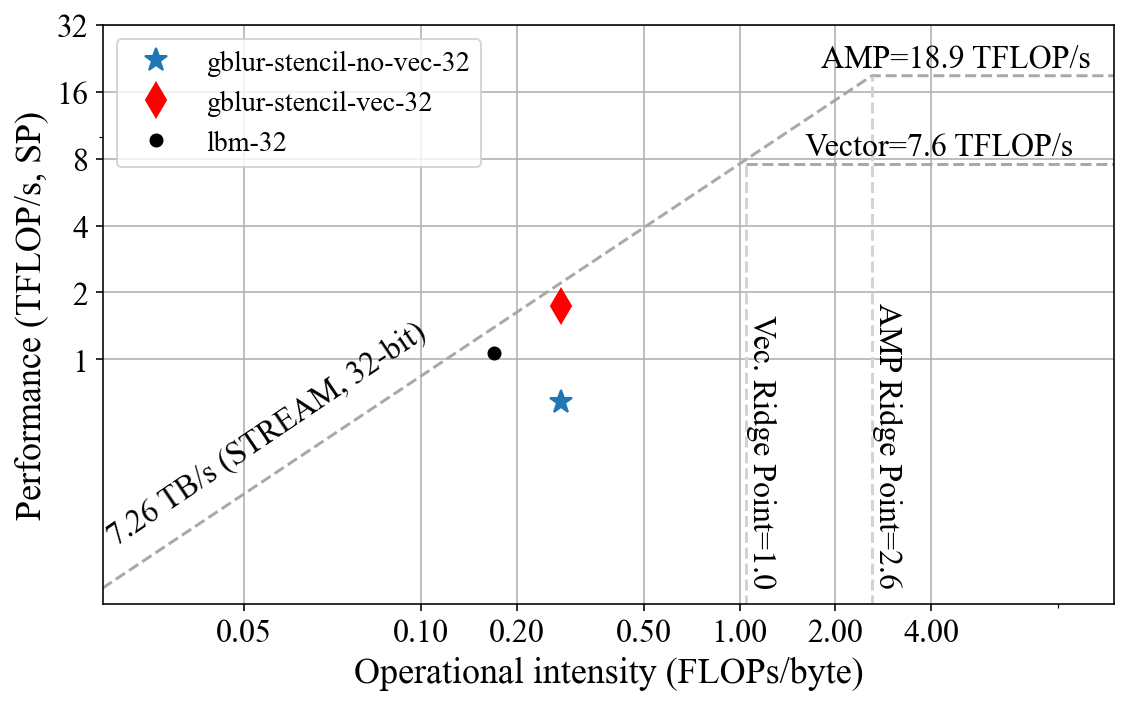

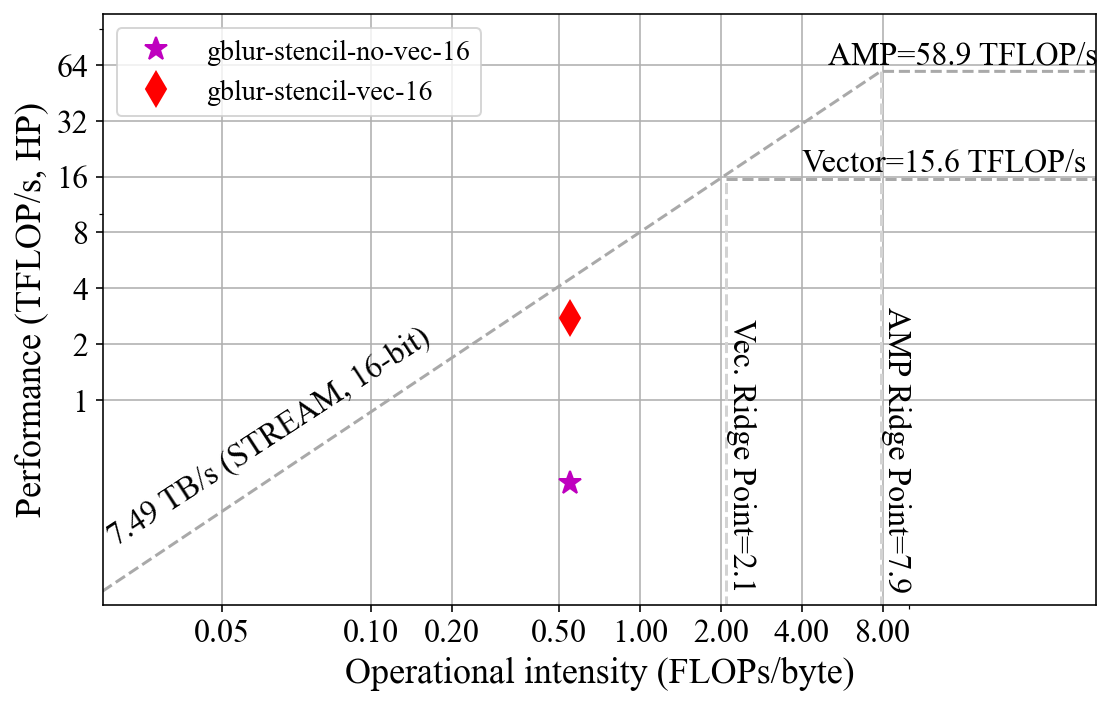

In [22]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.usetex'] = 'False'
fig1, ax1 = plt.subplots(1,1, figsize=(8,5))
fig2, ax2 = plt.subplots(1,1, figsize=(8,5))

ax = [ax1, ax2]
peak_tflops_sp_vec = 7.6
peak_tflops_hp_vec = 15.6
peak_tflops_sp_amp = 18.9
peak_tflops_hp_amp = 58.9
peak_stream_sp_poplibs = 7260.8/1000
peak_stream_hp_poplibs = 7489.34/1000
mem_ridge_point_sp1 = peak_tflops_sp_vec / peak_stream_sp_poplibs
mem_ridge_point_sp2 = peak_tflops_sp_amp / peak_stream_sp_poplibs
mem_ridge_point_hp1 = peak_tflops_hp_vec / peak_stream_hp_poplibs
mem_ridge_point_hp2 = peak_tflops_hp_amp / peak_stream_hp_poplibs

c0 = peak_tflops_sp_vec - mem_ridge_point_sp1 * peak_stream_sp_poplibs
c_hp= peak_tflops_hp_vec - mem_ridge_point_hp1 * peak_stream_hp_poplibs
x_int = 0.01
y_int = peak_stream_sp_poplibs * x_int + c0
y_int_hp =peak_stream_hp_poplibs *x_int + c_hp

mem_oi = [1,1,1,1]
mem_oi[0] = [(mem_ridge_point_sp1, peak_tflops_sp_vec),(100, peak_tflops_sp_vec)]
mem_oi[1] = [(x_int,y_int),(mem_ridge_point_sp2, peak_tflops_sp_amp),(100, peak_tflops_sp_amp)]
mem_oi[2] = [(mem_ridge_point_hp1, peak_tflops_hp_vec),(100, peak_tflops_hp_vec)]
mem_oi[3] = [(x_int,y_int_hp),(mem_ridge_point_hp2, peak_tflops_hp_amp),(100, peak_tflops_hp_amp)]

for i in range(2):
    ax[0].plot([x for x,y in mem_oi[i]], [y for x,y in mem_oi[i]], '--', markersize=0.,  c='darkgray')


for i in range(2,4):
    ax[1].plot([x for x,y in mem_oi[i]], [y for x,y in mem_oi[i]], '--', markersize=0.,  c='darkgray')

ax[0].set_xlim((0.01,15))
ax[0].set_ylim((0.01,20))

ax[1].set_xlim((0.01,50))
ax[1].set_ylim((0.01,120))


ax[0].set_xscale("symlog", linthreshx=0.1)
ax[0].set_yscale("symlog", linthreshy=1)

ax[1].set_xscale("symlog", linthreshx=0.1)
ax[1].set_yscale("symlog", linthreshy=1)

def tflops(time, image):
    Tera =  1e12
    image_sizes = dict(cheese=(2200,1122), leaf=(768,1024), bricks=(499,302))
    x,y = image_sizes[image]
    return (x * y * 4 * 11 * 200)/time/Tera

def glups_to_tflops(glups):
    lups =glups * 1e9 
    flops =  lups * 111 
    return flops /1e12
    
data = [
   # (0.1,0.7, 'Memory-bound kernel', 'm*'),
   # (3.5,5, 'Compute-bound kernel', 'rd'),
    (0.275, tflops(28.36*1e-3, 'cheese')/0.927,  'gblur-stencil-no-vec-32','*'),
    ( 0.275, tflops(14.61*1e-3, 'cheese')/0.859, 'gblur-stencil-vec-32','rd'),
    (0.17, glups_to_tflops(6.970) /.996 /.73, 'lbm-32','k.')

]
data_hp = [
    #(0.1, 0.8, 'Memory-bound kernel', 'm*'),
    #(8.5,8.7, 'Compute-bound kernel', 'rd'),
    (0.55, tflops(42.73*1e-3, 'cheese')/0.849, 'gblur-stencil-no-vec-16','m*'),
    (0.55, tflops(9.2*1e-3, 'cheese')/0.849, 'gblur-stencil-vec-16', 'rd')
]

print("SP")
for x in data:
    print("%peak of {}  : {:.1f}%".format(x[2],x[1]/(x[0] *peak_stream_sp_poplibs + c0)*100))

print("HP")
for x in data_hp:
    print("%peak of {}  : {:.1f}%".format(x[2],x[1]/(x[0] *peak_stream_hp_poplibs + c_hp)*100))

    
for x in data:
    print([x[0]], [x[1]], x[3], x[2])
    ax[0].plot(x[0], x[1], x[3], markersize=12., label=x[2])

for x in data_hp:
    print([x[0]], [x[1]], x[3], x[2])
    ax[1].plot([x[0]], [x[1]], x[3], markersize=12., label=x[2])

ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax[0].set_ylabel("Performance (TFLOP/s, SP)", fontsize=18)
ax[1].set_ylabel("Performance (TFLOP/s, HP)", fontsize=18)

ax[0].set_xlabel("Operational intensity (FLOPs/byte)", fontsize=18)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[1].set_xlabel("Operational intensity (FLOPs/byte)", fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=16)

ax[0].legend(fontsize=14,loc='upper left')
ax[1].legend(fontsize=14,loc='upper left')

# ax[0].annotate('AMP={}TB/s', xy=data[1], xytext=(1, 1.1),
#             arrowprops=dict(facecolor='gray', shrink=0.05, width=2), fontsize=16)
# ax[0].annotate('Vector={}TB/s', xy=data[0], xytext=(4, 8),
#             arrowprops=dict(facecolor='gray', shrink=0.05, width=2), fontsize=16)
ax[0].annotate('AMP={} TFLOP/s'.format(peak_tflops_sp_amp), xy=(10,10), xytext=(1.8, peak_tflops_sp_amp*1.1), fontsize=16, fontfamily='Times New Roman')
ax[0].annotate('Vector={} TFLOP/s'.format(peak_tflops_sp_vec), xy=(10,10), xytext=(1.6, peak_tflops_sp_vec*1.1), fontsize=16, fontfamily='Times New Roman')

ax[1].annotate('AMP={} TFLOP/s'.format(peak_tflops_hp_amp), xy=(10,10), xytext=(5, peak_tflops_hp_amp*1.1), fontsize=16, fontfamily='Times New Roman')
ax[1].annotate('Vector={} TFLOP/s'.format(peak_tflops_hp_vec), xy=(10,10), xytext=(4, peak_tflops_hp_vec*1.1), fontsize=16, fontfamily='Times New Roman')

ax[0].text(0.01, 0.25, '{:.2f} TB/s (STREAM, 32-bit)'.format(peak_stream_sp_poplibs),  rotation=34, fontsize=16, fontfamily='Times New Roman')
ax[1].text(0.01, 0.3, '{:.2f} TB/s (STREAM, 16-bit)'.format(peak_stream_hp_poplibs),  rotation=33, fontsize=16, fontfamily='Times New Roman')

ax[0].plot((mem_ridge_point_sp1,mem_ridge_point_sp1),(0,peak_tflops_sp_vec), '--', color='lightgray')
ax[0].plot((mem_ridge_point_sp2,mem_ridge_point_sp2),(0,peak_tflops_sp_amp), '--', color='lightgray')

ax[0].text(mem_ridge_point_sp1,0.1,'Vec. Ridge Point={:.1f}'.format(mem_ridge_point_sp1),fontsize=16,rotation=-90,fontfamily='Times New Roman');
ax[0].text(mem_ridge_point_sp2,0.1,'AMP Ridge Point={:.1f}'.format(mem_ridge_point_sp2),fontsize=16,rotation=-90,fontfamily='Times New Roman');

ax[1].text(mem_ridge_point_hp1,0.1,'Vec. Ridge Point={:.1f}'.format(mem_ridge_point_hp1),fontsize=16,rotation=-90,fontfamily='Times New Roman');
ax[1].text(mem_ridge_point_hp2,0.1,'AMP Ridge Point={:.1f}'.format(mem_ridge_point_hp2),fontsize=16,rotation=-90,fontfamily='Times New Roman');


ax[1].plot((mem_ridge_point_hp1,mem_ridge_point_hp1),(0,peak_tflops_hp_vec), '--', color='lightgray')
ax[1].plot((mem_ridge_point_hp2,mem_ridge_point_hp2),(0,peak_tflops_hp_amp), '--', color='lightgray')

ax[0].set_xticks([0.05,0.1,0.2,0.5,1.0,2.0,4.0])
ax[1].set_xticks([0.05,0.1,0.2,0.5,1.0,2.0,4.0, 8])

ax[0].set_yticks([1,2,4,8,16,32])
ax[1].set_yticks([1,2,4,8,16,32,64])

# ax[0].set_title('IPU Roofline, Single Precision', fontsize=24)
# ax[1].set_title('IPU Roofline, Half Precision',fontsize=24)

ax[0].grid()
ax[1].grid()

fig1.tight_layout()
plt.figure(fig1.number)
plt.savefig('/tmp/ipu-roofline-sp.png', dpi=150)

fig2.tight_layout()
plt.figure(fig2.number)
plt.savefig('/tmp/ipu-roofline-hp.png', dpi=150)